<h1>Exploratory Data Analysis into the files online</h1>

<h1>Summary of Data over the years</h1>

<h2>2009 data:</h2>
"Resources\LUCAS datasets\LUCAS 2009\LUCAS_21681_points\NoSensitive.csv"

Columns:
POINT_ID|"sample_ID"|"X_LAEA"|"Y_LAEA"|"coarse"|"clay"|"silt"|"sand"|"pH_in_H2O"|"pH_in_CaCl"|"OC"|"CaCO3"|"N"|"P_x"|"K"|"CEC"|"Notes"|"GPS_LAT"|"GPS_LONG"|"X"|"Country"|"PTotal"|"Corine_LU"|"coords_x1"|"coords_x2"|"SURV_DATE"|"LC1"|"LC-parent"|"LC-Group"|"LC2"|"OBS_RADIUS"|"LU1"|"LU2"|"LC1_SPECIE"|"LC1_PERCEN"|"LC2_SPECIE"|"LC2_PERCEN"|"AREA_SIZE"|"TREES_HEIG"|"FEATURES_W"|"LAND_MNGT"|"WM_WATER_M"|"WM_SRC_IRR"|"WM_TYP_IRR"|"WM_DELIVER"|"SOIL_SURVE"|"SOIL_PLOUG"|"SOIL_CROP"|"SOIL_STONE"|"STRATA"|"STRATA2"|"nuts3"|"nuts0"|"area0"|"nuts1"|"area1"|"nuts2"|"area2"|"area3"|"Transect"|"CLIMANR"|"MAIN_CLIMA"|"LC"|"lc_GROUP"|"WRB_COD"|"AnnualPrec"|"WRB_LV1"|"ParMat1"|"ParMat2"|"Elevation(m)"|"slope (Degrees)"|"LONG"|"LAT"|"geom_X"|"geom_Y"
21,681 Rows

Total Phosphorous (PTotal)
"Resources\LUCAS datasets\LUCAS 2009\PTotal_points\PTotal2009.csv"

Columns:
POINT_ID|"PTotal"|"Country"|"LONG"|"LAT"|"geom_X"|"geom_Y"
21,859 Rows

<u>_(1) Compare a list of Point IDs (join / merge) in csv file. Combine PTotal for points that have PTotal into the NoSensitive.csv data_</u>

<u>_(2) Compare a list of Point IDs (join / merge) in shp file. Plot (1) into map_</u>

Note: We should look at comparing all the PointID and label by year from each file as "there are 21,859 points, of which 4,246 are at new locations when compared with the 2009/2012 campaigns" i.e. the 21,859 PointIDs in 2009 file may be referring to a different location in the 2015 and onwards file. #Before# joining the data from each year into the data. Thereafter, assigning new PointIDs to these 4,246 locations. "Revisited_point" in 2015 helps to identify these points.

<h2>2015 data</h2>
"Resources\LUCAS datasets\LUCAS 2015\LUCAS2015_topsoildata_20200323\LUCAS_Topsoil_2015_20200323.csv"

Columns:
Point_ID	Revisited_point	Coarse	Clay	Sand	Silt	pH(CaCl2)	pH(H2O)	EC	OC	CaCO3	P	N	K	Elevation	LC1	LU1	Soil_Stones	NUTS_0	NUTS_1	NUTS_2	NUTS_3	LC1_Desc	LU1_Desc
21","859 points

<h2>2018 data</h2>
"Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS-SOIL-2018.csv"

Columns:
Depth	POINTID	pH_CaCl2	pH_H2O	EC	OC	CaCO3	P	N	K	OC (20-30 cm)	CaCO3 (20-30 cm)	Ox_Al	Ox_Fe	NUTS_0	NUTS_1	NUTS_2	NUTS_3	TH_LAT	TH_LONG	SURVEY_DATE	Elev	LC	LU	LC0_Desc	LC1_Desc	LU1_Desc


<h2>Test / Indications of Soil Erosion / Soil Health</h2>

Bulk Density of soil at each depth:
"Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\BulkDensity_2018_final-2.csv"

Level of soil erosion:
"Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_EROSION.csv"

Conditions of Organic Soil (vs other soil being eroded over):
"Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_ORG.csv"

Will need to understand the report methodology to determine what scenario these three data sets are meant to illustrate



In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# filepaths
lucas_2009_soil_shp_path = "Resources\LUCAS datasets\LUCAS 2009\LUCAS_21681_points\LUCAS_Points.shp"
lucas_2009_PTotal_path = "Resources\LUCAS datasets\LUCAS 2009\PTotal_points\PTotal2009.shp"
lucas_2015_soil_shp_path = "Resources\LUCAS datasets\LUCAS 2015\LUCAS2015_topsoildata_20200323\LUCAS_Topsoil_2015_20200323-shapefile\LUCAS_Topsoil_2015_20200323.shp"
lucas_2018_soil_shp_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS-SOIL-2018 .shp"

lucas_2009_soil_data_path = "Resources\LUCAS datasets\LUCAS 2009\LUCAS_21681_points\LUCAS_2009_Soil.csv"
lucas_2009_PTotal_data_path = "Resources\LUCAS datasets\LUCAS 2009\PTotal_points\PTotal2009.csv"
lucas_2015_soil_data_path = "Resources\LUCAS datasets\LUCAS 2015\LUCAS2015_topsoildata_20200323\LUCAS_Topsoil_2015_20200323.csv"
lucas_2018_soil_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS-SOIL-2018.csv"

lucas_erosion_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_EROSION.csv"
lucas_bulkdensity_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\BulkDensity_2018_final-2.csv"
lucas_organic_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_ORG.csv"


In [25]:
# read shp files
lucas_2009_soil_shp = gpd.read_file(lucas_2009_soil_shp_path)
lucas_2009_PTotal_shp = gpd.read_file(lucas_2009_PTotal_path)
lucas_2015_soil_shp = gpd.read_file(lucas_2015_soil_shp_path)
lucas_2018_soil_shp = gpd.read_file(lucas_2018_soil_shp_path)

# read csv files
try:
    lucas_2009_soil_data = pd.read_csv(lucas_2009_soil_data_path, delimiter="|")
    lucas_2009_PTotal_data = pd.read_csv(lucas_2009_PTotal_data_path, delimiter="|")
except:
    lucas_2009_soil_data = pd.read_csv(lucas_2009_soil_data_path, delimiter=",")
    lucas_2009_PTotal_data = pd.read_csv(lucas_2009_PTotal_data_path, delimiter=",")
    
lucas_2015_soil_data = pd.read_csv(lucas_2015_soil_data_path, delimiter=",")
lucas_2018_soil_data = pd.read_csv(lucas_2018_soil_data_path, delimiter=",")

lucas_erosion_data = pd.read_csv(lucas_erosion_data_path, delimiter=",")
lucas_bulkdensity_data = pd.read_csv(lucas_bulkdensity_data_path, delimiter=",")
lucas_organic_data = pd.read_csv(lucas_organic_data_path, delimiter=",")


In [74]:
# Convert delimiter for easier visualisation in csv
lucas_2009_soil_data.to_csv(lucas_2009_soil_data_path)
lucas_2009_PTotal_data.to_csv(lucas_2009_PTotal_data_path)

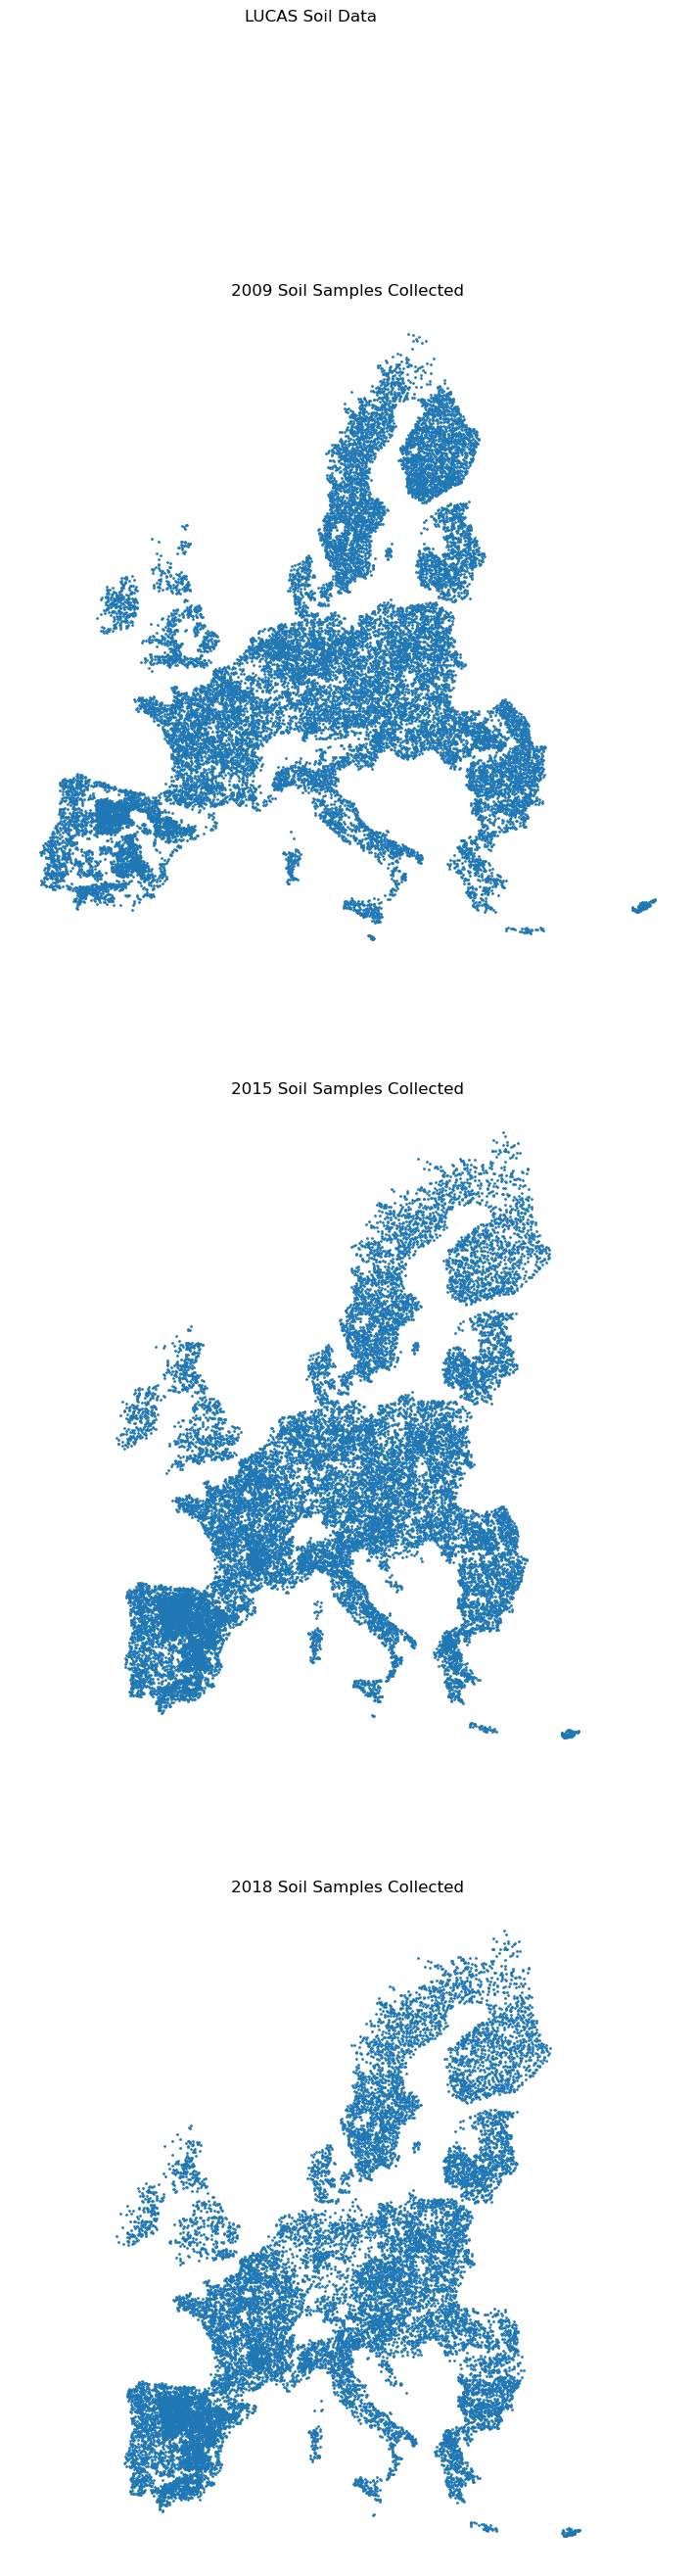

In [146]:
def visualise_maps():
    fig, ax = plt.subplots(3, figsize=(30,30))    
    fig.suptitle("LUCAS Soil Data", fontdict={"size":"25"})
    ax[0].axis("off")    
    ax[0].set_title("2009 Soil Samples Collected")
    lucas_2009_soil_shp.plot(ax=ax[0], markersize=1)
    
    ax[1].axis("off")
    ax[1].set_title("2015 Soil Samples Collected")
    lucas_2015_soil_shp.plot(ax=ax[1], markersize=1)

    ax[2].axis("off")
    ax[2].set_title("2018 Soil Samples Collected")
    lucas_2018_soil_shp.plot(ax=ax[2], markersize=1)

visualise_maps()

In [5]:
def compare_columns(df1, df2):
    print(df1.columns)
    print(df2.columns)
    column_df = pd.DataFrame({"df1": df1.columns})
    column_df = column_df.join(pd.DataFrame({"df2": df2.columns}))
    print(column_df)

compare_columns(lucas_2009_soil_data, lucas_2009_PTotal_data)

Index(['POINT_ID', 'sample_ID', 'X_LAEA', 'Y_LAEA', 'coarse', 'clay', 'silt',
       'sand', 'pH_in_H2O', 'pH_in_CaCl', 'OC', 'CaCO3', 'N', 'P_x', 'K',
       'CEC', 'Notes', 'GPS_LAT', 'GPS_LONG', 'X', 'Country', 'PTotal',
       'Corine_LU', 'coords_x1', 'coords_x2', 'SURV_DATE', 'LC1', 'LC-parent',
       'LC-Group', 'LC2', 'OBS_RADIUS', 'LU1', 'LU2', 'LC1_SPECIE',
       'LC1_PERCEN', 'LC2_SPECIE', 'LC2_PERCEN', 'AREA_SIZE', 'TREES_HEIG',
       'FEATURES_W', 'LAND_MNGT', 'WM_WATER_M', 'WM_SRC_IRR', 'WM_TYP_IRR',
       'WM_DELIVER', 'SOIL_SURVE', 'SOIL_PLOUG', 'SOIL_CROP', 'SOIL_STONE',
       'STRATA', 'STRATA2', 'nuts3', 'nuts0', 'area0', 'nuts1', 'area1',
       'nuts2', 'area2', 'area3', 'Transect', 'CLIMANR', 'MAIN_CLIMA', 'LC',
       'lc_GROUP', 'WRB_COD', 'AnnualPrec', 'WRB_LV1', 'ParMat1', 'ParMat2',
       'Elevation(m)', 'slope (Degrees)', 'LONG', 'LAT', 'geom_X', 'geom_Y'],
      dtype='object')
Index(['POINT_ID', 'PTotal', 'Country', 'LONG', 'LAT', 'geom_X', 'geom_Y']

<h1>On 2009 Data</h1>

<h2>On 2009 Soil Data</h2>


_**lucas_2009_soil_data already contains the same PTotal values as in lucas_2009_PTotal_data. No need for additional merging**_

Columns:
<br> 'POINT_ID', 'sample_ID', 'X_LAEA', 'Y_LAEA',
<br> 'coarse', 'clay', 'silt', 'sand',
<br> 'pH_in_H2O', 'pH_in_CaCl', 'OC', 'CaCO3', 'N', 'P_x', 'K', 'CEC', 'Notes',
<br> 'GPS_LAT', 'GPS_LONG', 'X',
<br> 'Country', 'PTotal',
<br> 'Corine_LU', 'coords_x1', 'coords_x2', 'SURV_DATE',
<br> 'LC1', 'LC-parent', 'LC-Group', 'LC2', 'OBS_RADIUS', 'LU1', 'LU2', 'LC1_SPECIE',
<br> 'LC1_PERCEN', 'LC2_SPECIE', 'LC2_PERCEN', 'AREA_SIZE', 'TREES_HEIG',
<br> 'FEATURES_W', 'LAND_MNGT', 'WM_WATER_M', 'WM_SRC_IRR', 'WM_TYP_IRR',
<br> 'WM_DELIVER', 'SOIL_SURVE', 'SOIL_PLOUG', 'SOIL_CROP', 'SOIL_STONE',
<br> 'STRATA', 'STRATA2', 'nuts3', 'nuts0', 'area0', 'nuts1', 'area1',
<br> 'nuts2', 'area2', 'area3', 'Transect', 'CLIMANR', 'MAIN_CLIMA', 'LC',
<br> 'lc_GROUP', 'WRB_COD', 'AnnualPrec', 'WRB_LV1', 'ParMat1', 'ParMat2',
<br> 'Elevation(m)', 'slope (Degrees)', 'LONG', 'LAT', 'geom_X', 'geom_Y'

POINT_ID = retain as column 1
<br> sample_ID, X_LAEA, Y_LAEA = drop. Included in coordinates
<br> 'coarse', 'clay', 'silt', 'sand' = retain. % of type of soil at that location
<br> 'pH_in_H2O', 'pH_in_CaCl', 'OC', 'CaCO3', 'N', 'P_x', 'K', 'CEC', 'Notes' = retain. All soil chemical qualities (non-erosion based indicator of soil quality)

'GPS_LAT', 'GPS_LONG', 'X' = X, unsure what it corresponds to. Drop if possible
<br> 'Country', 'PTotal', = retain
<br> 'Corine_LU', 'coords_x1', 'coords_x2', 'SURV_DATE' = drop

<h3>Land Cover Data Classification (throughout the years)</h3>  
<br> (A00) artificial land  
<br> (B00) cropland  
<br> (C00) woodland  
<br> (D00) shrubland  
<br> (E00) grassland  
<br> (F00) bare land  
<br> (G00) water  
<br> (H00) wetland  





In [56]:
# Tagging the results with the "YEARS_AGO" column. 6 for Bulgaria and Romania, 9 for the rest
lucas_2009_soil_data["YEARS_AGO"] = np.where(
    (lucas_2009_soil_data["Country"] == "Bulgaria") | (lucas_2009_soil_data["Country"] == "Romania"),
    6, 9)
lucas_2009_soil_data

,POINT_ID,sample_ID,X_LAEA,Y_LAEA,coarse,clay,silt,sand,pH_in_H2O,pH_in_CaCl,...,WRB_LV1,ParMat1,ParMat2,Elevation(m),slope (Degrees),LONG,LAT,geom_X,geom_Y,YEARS_AGO
0,26521974,17844,2652000.0,1974000.0,8,10,14,76,4.84,3.75,...,Cambisol,consolidated-clastic-sedimentary rocks,psammite or arenite,150,3.433630,-9.36144,38.92962,2.652001e+06,1.973999e+06,9
1,26561964,17845,2656000.0,1964000.0,28,41,48,11,7.31,6.81,...,Cambisol,consolidated-clastic-sedimentary rocks,psammite or arenite,154,7.735191,-9.29050,38.85139,2.656000e+06,1.964001e+06,9
2,26581768,17641,2658000.0,1768000.0,14,25,29,46,7.40,6.96,...,Luvisol,sedimentary rocks (chemically precipitated/eva...,calcareous rocks,56,0.000000,-8.77525,37.13911,2.658000e+06,1.768001e+06,9
3,26581792,17643,2658000.0,1792000.0,18,26,49,25,6.09,5.43,...,Podzol,metamorphic rocks,acid regional metamorphic rocks,16,9.648046,-8.83372,37.34975,2.658001e+06,1.792000e+06,9
4,26581954,17846,2658000.0,1954000.0,11,34,37,29,8.21,7.52,...,Vertisol,igneous rocks,basic plutonic rocks,182,4.298638,-9.24210,38.76854,2.658000e+06,1.954001e+06,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21676,90000001,31005,6480000.0,1666000.0,5,43,38,20,7.89,7.17,...,NaN,NaN,NaN,45,0.000000,33.82302,35.01154,6.480000e+06,1.666000e+06,9
21677,90000002,31089,6482000.0,1664000.0,3,56,25,19,8.28,7.38,...,NaN,NaN,NaN,48,7.039865,33.83823,34.98872,6.482000e+06,1.664000e+06,9
21678,90000003,31090,6470000.0,1664000.0,23,26,29,46,8.06,7.45,...,NaN,NaN,NaN,89,2.592406,33.71210,35.02205,6.470000e+06,1.664000e+06,9
21679,90000004,31091,6474000.0,1666000.0,10,22,23,55,8.34,7.54,...,NaN,NaN,NaN,55,14.371304,33.75995,35.02822,6.474000e+06,1.666001e+06,9


In [151]:
lucas_2009_soil_data['LC-Group'].value_counts()

B    9765
C    5906
E    4961
D     523
F     381
H      89
A      45
G      11
Name: LC-Group, dtype: int64

<h1>On 2015 Data</h1>

<h2>On 2015 Soil Data</h2>


Columns:
'Point_ID', 'Revisited_point',
'Coarse', 'Clay', 'Sand', 'Silt',
'pH(CaCl2)', 'pH(H2O)', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K',
'Elevation', 'LC1', 'LU1', 'Soil_Stones',
'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3',
'LC1_Desc', 'LU1_Desc'




In [149]:
lucas_2009_soil_data.columns

Index(['POINT_ID', 'sample_ID', 'X_LAEA', 'Y_LAEA', 'coarse', 'clay', 'silt',
       'sand', 'pH_in_H2O', 'pH_in_CaCl', 'OC', 'CaCO3', 'N', 'P_x', 'K',
       'CEC', 'Notes', 'GPS_LAT', 'GPS_LONG', 'X', 'Country', 'PTotal',
       'Corine_LU', 'coords_x1', 'coords_x2', 'SURV_DATE', 'LC1', 'LC-parent',
       'LC-Group', 'LC2', 'OBS_RADIUS', 'LU1', 'LU2', 'LC1_SPECIE',
       'LC1_PERCEN', 'LC2_SPECIE', 'LC2_PERCEN', 'AREA_SIZE', 'TREES_HEIG',
       'FEATURES_W', 'LAND_MNGT', 'WM_WATER_M', 'WM_SRC_IRR', 'WM_TYP_IRR',
       'WM_DELIVER', 'SOIL_SURVE', 'SOIL_PLOUG', 'SOIL_CROP', 'SOIL_STONE',
       'STRATA', 'STRATA2', 'nuts3', 'nuts0', 'area0', 'nuts1', 'area1',
       'nuts2', 'area2', 'area3', 'Transect', 'CLIMANR', 'MAIN_CLIMA', 'LC',
       'lc_GROUP', 'WRB_COD', 'AnnualPrec', 'WRB_LV1', 'ParMat1', 'ParMat2',
       'Elevation(m)', 'slope (Degrees)', 'LONG', 'LAT', 'geom_X', 'geom_Y',
       'YEARS_AGO'],
      dtype='object')

<h1>On 2018 Data</h1>

<h2>On 2018 Erosion Data</h2>

Columns:
POINT_ID,SURVEY_EROSION_SIGNS,SURVEY_EROSION_SHEET,
SURVEY_EROSION_SHEET_P,SURVEY_EROSION_SHEET_N,SURVEY_EROSION_SHEET_E,SURVEY_EROSION_SHEET_S,SURVEY_EROSION_SHEET_W,
SURVEY_EROSION_SHEET_NR,SURVEY_EROSION_SHEET_N_DIST_M,SURVEY_EROSION_SHEET_E_DIST_M,SURVEY_EROSION_SHEET_S_DIST_M,SURVEY_EROSION_SHEET_W_DIST_M,
SURVEY_EROSION_RILL,SURVEY_EROSION_RILL_P,SURVEY_EROSION_RILL_N,SURVEY_EROSION_RILL_E,SURVEY_EROSION_RILL_W,SURVEY_EROSION_RILL_S,
SURVEY_EROSION_RILL_NR,SURVEY_EROSION_RILL_N_DIST_M,SURVEY_EROSION_RILL_E_DIST_M,SURVEY_EROSION_RILL_S_DIST_M,SURVEY_EROSION_RILL_W_DIST_M,
SURVEY_EROSION_GULLY,SURVEY_EROSION_GULLY_P,SURVEY_EROSION_GULLY_N,SURVEY_EROSION_GULLY_E,SURVEY_EROSION_GULLY_S,SURVEY_EROSION_GULLY_W,SURVEY_EROSION_GULLY_NR,SURVEY_EROSION_GULLY_N_DIST_M,SURVEY_EROSION_GULLY_E_DIST_M,SURVEY_EROSION_GULLY_S_DIST_M,SURVEY_EROSION_GULLY_W_DIST_M,
SURVEY_EROSION_MASS,SURVEY_EROSION_MASS_P,SURVEY_EROSION_MASS_N,SURVEY_EROSION_MASS_E,SURVEY_EROSION_MASS_S,SURVEY_EROSION_MASS_W,SURVEY_EROSION_MASS_NR,
SURVEY_EROSION_MASS_N_DIST_M,SURVEY_EROSION_MASS_E_DIST_M,SURVEY_EROSION_MASS_S_DIST_M,SURVEY_EROSION_MASS_W_DIST_M,SURVEY_EROSION_DEP,SURVEY_EROSION_DEP_P,SURVEY_EROSION_DEP_N,SURVEY_EROSION_DEP_E,SURVEY_EROSION_DEP_S,SURVEY_EROSION_DEP_W,SURVEY_EROSION_DEP_NR,SURVEY_EROSION_DEP_N_DIST_M,SURVEY_EROSION_DEP_E_DIST_M,SURVEY_EROSION_DEP_S_DIST_M,SURVEY_EROSION_DEP_W_DIST_M,SURVEY_EROSION_WIND,SURVEY_EROSION_WIND_P,SURVEY_EROSION_WIND_N,SURVEY_EROSION_WIND_E,SURVEY_EROSION_WIND_S,SURVEY_EROSION_WIND_W,SURVEY_EROSION_WIND_NR,SURVEY_EROSION_WIND_N_DIST_M,SURVEY_EROSION_WIND_E_DIST_M,SURVEY_EROSION_WIND_S_DIST_M,SURVEY_EROSION_WIND_W_DIST_M,SURVEY_EROSION_RILLGULLY_N

To note:
SURVEY_EROSION_SHEET = empty col to remove
All with no PNSEW attached and _NR = all empty cols to remove

POINT_ID,SURVEY_EROSION_SIGNS,
SURVEY_EROSION_SHEET_P,SURVEY_EROSION_SHEET_N,SURVEY_EROSION_SHEET_E,SURVEY_EROSION_SHEET_S,SURVEY_EROSION_SHEET_W,
SURVEY_EROSION_SHEET_N_DIST_M,SURVEY_EROSION_SHEET_E_DIST_M,SURVEY_EROSION_SHEET_S_DIST_M,SURVEY_EROSION_SHEET_W_DIST_M,
SURVEY_EROSION_RILL_P,SURVEY_EROSION_RILL_N,SURVEY_EROSION_RILL_E,SURVEY_EROSION_RILL_W,SURVEY_EROSION_RILL_S,
SURVEY_EROSION_RILL_N_DIST_M,SURVEY_EROSION_RILL_E_DIST_M,SURVEY_EROSION_RILL_S_DIST_M,SURVEY_EROSION_RILL_W_DIST_M,
SURVEY_EROSION_GULLY_P,SURVEY_EROSION_GULLY_N,SURVEY_EROSION_GULLY_E,SURVEY_EROSION_GULLY_S,SURVEY_EROSION_GULLY_W,SURVEY_EROSION_GULLY_N_DIST_M,SURVEY_EROSION_GULLY_E_DIST_M,SURVEY_EROSION_GULLY_S_DIST_M,SURVEY_EROSION_GULLY_W_DIST_M,
SURVEY_EROSION_MASS_P,SURVEY_EROSION_MASS_N,SURVEY_EROSION_MASS_E,SURVEY_EROSION_MASS_S,SURVEY_EROSION_MASS_W,
SURVEY_EROSION_MASS_N_DIST_M,SURVEY_EROSION_MASS_E_DIST_M,SURVEY_EROSION_MASS_S_DIST_M,SURVEY_EROSION_MASS_W_DIST_M,SURVEY_EROSION_DEP_P,SURVEY_EROSION_DEP_N,SURVEY_EROSION_DEP_E,SURVEY_EROSION_DEP_S,SURVEY_EROSION_DEP_W,SURVEY_EROSION_DEP_N_DIST_M,SURVEY_EROSION_DEP_E_DIST_M,SURVEY_EROSION_DEP_S_DIST_M,SURVEY_EROSION_DEP_W_DIST_M,SURVEY_EROSION_WIND_P,SURVEY_EROSION_WIND_N,SURVEY_EROSION_WIND_E,SURVEY_EROSION_WIND_S,SURVEY_EROSION_WIND_W,SURVEY_EROSION_WIND_N_DIST_M,SURVEY_EROSION_WIND_E_DIST_M,SURVEY_EROSION_WIND_S_DIST_M,SURVEY_EROSION_WIND_W_DIST_M,SURVEY_EROSION_RILLGULLY_N


In [117]:
df_ero = lucas_erosion_data.loc[:,["POINT_ID","SURVEY_EROSION_SIGNS",
                                    "SURVEY_EROSION_SHEET_P","SURVEY_EROSION_SHEET_N","SURVEY_EROSION_SHEET_E","SURVEY_EROSION_SHEET_S","SURVEY_EROSION_SHEET_W","SURVEY_EROSION_SHEET_N_DIST_M","SURVEY_EROSION_SHEET_E_DIST_M","SURVEY_EROSION_SHEET_S_DIST_M","SURVEY_EROSION_SHEET_W_DIST_M",
                                    "SURVEY_EROSION_RILL_P","SURVEY_EROSION_RILL_N","SURVEY_EROSION_RILL_E","SURVEY_EROSION_RILL_W","SURVEY_EROSION_RILL_S","SURVEY_EROSION_RILL_N_DIST_M","SURVEY_EROSION_RILL_E_DIST_M","SURVEY_EROSION_RILL_S_DIST_M","SURVEY_EROSION_RILL_W_DIST_M",
                                    "SURVEY_EROSION_GULLY_P","SURVEY_EROSION_GULLY_N","SURVEY_EROSION_GULLY_E","SURVEY_EROSION_GULLY_S","SURVEY_EROSION_GULLY_W","SURVEY_EROSION_GULLY_N_DIST_M","SURVEY_EROSION_GULLY_E_DIST_M","SURVEY_EROSION_GULLY_S_DIST_M","SURVEY_EROSION_GULLY_W_DIST_M",
                                    "SURVEY_EROSION_MASS_P","SURVEY_EROSION_MASS_N","SURVEY_EROSION_MASS_E","SURVEY_EROSION_MASS_S","SURVEY_EROSION_MASS_W","SURVEY_EROSION_MASS_N_DIST_M","SURVEY_EROSION_MASS_E_DIST_M","SURVEY_EROSION_MASS_S_DIST_M","SURVEY_EROSION_MASS_W_DIST_M",
                                    "SURVEY_EROSION_DEP_P","SURVEY_EROSION_DEP_N","SURVEY_EROSION_DEP_E","SURVEY_EROSION_DEP_S","SURVEY_EROSION_DEP_W","SURVEY_EROSION_DEP_N_DIST_M","SURVEY_EROSION_DEP_E_DIST_M","SURVEY_EROSION_DEP_S_DIST_M","SURVEY_EROSION_DEP_W_DIST_M",
                                    "SURVEY_EROSION_WIND_P","SURVEY_EROSION_WIND_N","SURVEY_EROSION_WIND_E","SURVEY_EROSION_WIND_S","SURVEY_EROSION_WIND_W","SURVEY_EROSION_WIND_N_DIST_M","SURVEY_EROSION_WIND_E_DIST_M","SURVEY_EROSION_WIND_S_DIST_M","SURVEY_EROSION_WIND_W_DIST_M","SURVEY_EROSION_RILLGULLY_N"]]

In [118]:
df_ero

,POINT_ID,SURVEY_EROSION_SIGNS,SURVEY_EROSION_SHEET_P,SURVEY_EROSION_SHEET_N,SURVEY_EROSION_SHEET_E,SURVEY_EROSION_SHEET_S,SURVEY_EROSION_SHEET_W,SURVEY_EROSION_SHEET_N_DIST_M,SURVEY_EROSION_SHEET_E_DIST_M,SURVEY_EROSION_SHEET_S_DIST_M,...,SURVEY_EROSION_WIND_P,SURVEY_EROSION_WIND_N,SURVEY_EROSION_WIND_E,SURVEY_EROSION_WIND_S,SURVEY_EROSION_WIND_W,SURVEY_EROSION_WIND_N_DIST_M,SURVEY_EROSION_WIND_E_DIST_M,SURVEY_EROSION_WIND_S_DIST_M,SURVEY_EROSION_WIND_W_DIST_M,SURVEY_EROSION_RILLGULLY_N
0,37963072,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,55762590,1,NaN,NaN,NaN,NaN,NaN,25.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64061606,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26761786,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0
4,26881988,1,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,NaN,20.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,64461632,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
875,64541646,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,64581660,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,64621658,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df_ero contains 879 rows of data, over 57 columns of erosion related fields (5 ea - P,N,S,E,W)

<h2>On 2018 Organic Topsoil Data</h2>

A measure of 'how much' organic soil there is

_**Caution**_: The shp files for organic soil data is not included, but the locations have been skewed towards "mineral soils with well-developed organic horizons or that peatlands have been eroded back to the underlying mineral base"
(_JRC Report 2018, Pg 27_)

Columns:
'POINT_ID', 'SURVEY_SOIL_ORG_CULTIVATED', 'SURVEY_SOIL_ORG_DEPTH_P_CM',
'SURVEY_SOIL_ORG_DEPTH_N_CM', 'SURVEY_SOIL_ORG_DEPTH_E_CM',
'SURVEY_SOIL_ORG_DEPTH_S_CM', 'SURVEY_SOIL_ORG_DEPTH_W_CM',
'SURVEY_SOIL_ORG_DEPTH_P_40_CM', 'SURVEY_SOIL_ORG_DEPTH_N_40_CM',
'SURVEY_SOIL_ORG_DEPTH_E_40_CM', 'SURVEY_SOIL_ORG_DEPTH_S_40_CM',
'SURVEY_SOIL_ORG_DEPTH_W_40_CM', 'SURVEY_SOIL_ORG_TAKEN',
'SURVEY_SOIL_ORG_DEPTH_CANDO'

_40_CM = binary of whether the organic depth of soil is more than 40 cm, sometimes the info can be found in >40, some times in the individual measurements. Sometimes they contradict.

'SURVEY_SOIL_ORG_TAKEN' = empty field. drop
SURVEY_SOIL_ORG_DEPTH_CANDO = to be omitted as all of the data is there. i.e. 1050 records have cando as 1


In [143]:
df_org = lucas_organic_data.copy()
df_org.drop(['SURVEY_SOIL_ORG_TAKEN','SURVEY_SOIL_ORG_DEPTH_CANDO'], axis=1, inplace=True)
df_org

,POINT_ID,SURVEY_SOIL_ORG_CULTIVATED,SURVEY_SOIL_ORG_DEPTH_P_CM,SURVEY_SOIL_ORG_DEPTH_N_CM,SURVEY_SOIL_ORG_DEPTH_E_CM,SURVEY_SOIL_ORG_DEPTH_S_CM,SURVEY_SOIL_ORG_DEPTH_W_CM,SURVEY_SOIL_ORG_DEPTH_P_40_CM,SURVEY_SOIL_ORG_DEPTH_N_40_CM,SURVEY_SOIL_ORG_DEPTH_E_40_CM,SURVEY_SOIL_ORG_DEPTH_S_40_CM,SURVEY_SOIL_ORG_DEPTH_W_40_CM
0,27602150,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
1,27842394,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0
2,27842416,2,18.0,23.0,NaN,21.0,NaN,0.0,0.0,0.0,0.0,0.0
3,27942164,2,23.0,16.0,18.0,20.0,14.0,0.0,0.0,0.0,0.0,0.0
4,28002400,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,54203812,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1046,54223834,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN
1047,54263840,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
1048,54761846,2,19.0,16.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Calculations on Organic Soil Data</h3>

Comparison with Mean and Std Dev of Organic Carbon (by **Climatic Zone** as well) is required
(_JRC Report 2018, Page 47_)

To be matched (POINT_ID to NUTS0,1,2,3) data, binned to the climatic zones


In [ ]:
pass

<h2>On 2018 Bulk Density Data</h2>
Bulk Density is an indicator of 'porous-ness' of soil. With denser top soil (0-10 cm or 10-20 cm) than deeper soil (10-20 cm or 20-30 cm)
The Denser a soil bulk density at the top, the increased chance of soil erosion

<a href="https://www.emnz.com/blogs/news/the-effect-of-the-soils-bulk-density#:~:text=Problems%20associated%20with%20a%20High%20Soil%20Bulk%20Density&text=It%20also%20affects%20soil%20aeration,waterlogged%20soils%20in%20flatter%20areas.">EMNZ Webpage</a>

However, "cultivation destroys soil organic matter and weakens the natural stability of soil aggregates making
them susceptible to damage caused by water and wind. When eroded soil particles fill pore space, porosity is
reduced and bulk density increases. Cultivation can result in compacted soil layers with increased bulk density, most notably, a plow pan"

"By reducing water infiltration into the soil, compaction can lead to increased runoff and erosion from sloping land or waterlogged soils in flatter areas. In general, some soil compaction to restrict water movement through the soil profile is  beneficial under arid conditions, but under humid conditions compaction decreases yields"

_It is dependent on climate of the zone. In wetter places, soil should be **porous (low BD)** for **lower erosion**_

<a href="https://cafnr.missouri.edu/wp-content/uploads/2016/09/bulk-density.pdf">Soil Quality Indicators by USDA</a>


